# Hierarchical Clustering
Author: Nico Kuijpers  
Date: March 28, 2021

Updated by Jacco Snoeren (July 2023)

## Introduction
Hierarchical clustering is one of the machine learning algorithms that can be applied for unsupervised learning. In this notebook we give an example of how to apply agglomerative clustering on the Iris dataset.

First import the libraries we need.

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

C:\Users\super\AppData\Local\Temp\ipykernel_18468\1482458398.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


numpy version: 1.26.4
pandas version: 2.2.0
scikit-learn version: 1.4.1.post1
seaborn version: 0.13.2
matplotlib version: 3.8.3


# 📦 Data provisioning
To illustrate hierarchical clustering we use the Iris dataset. The dataset consists of 149 entries, 4 input features, and 1 output label. The data set consists of about 50 samples from each of three species of Iris: Iris setosa, Iris virginica, and Iris versicolor. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

During clustering, we ignore the labels (unsupervised learning). We can compare the results of clustering with the labels afterwards. 

For more information on the Iris dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
# Download the Iris dataset from the internet
columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"]
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=columns)

## 📃 Sample the data
Get a first impression of the dataset by printing the data format and showing the first 5 rows and last 5 rows
of the DataFrame.

In [4]:
# Explore the Iris dataset
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(5)

Iris dataset shape: (150, 5)


Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [5]:
df_iris.tail(5)

Sepal Length  Sepal Width  Petal Length  Petal Width         Species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

Print the different species in the dataset.

In [6]:
print(df_iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Print the number of flowers for each species and visualize these numbers using a bar plot.

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: xlabel='Species'>

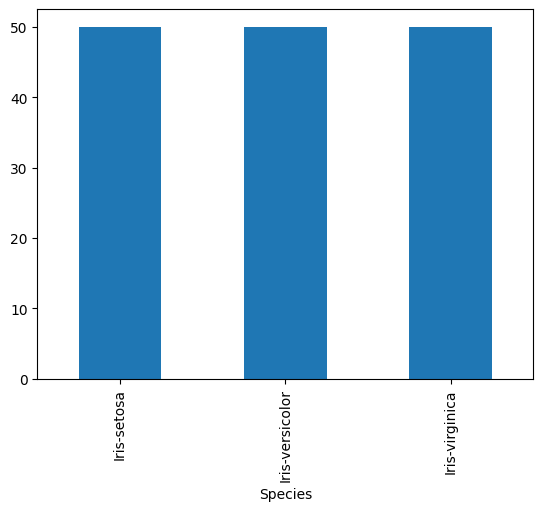

In [7]:
print(df_iris['Species'].value_counts())
df_iris['Species'].value_counts().plot(kind='bar')

# Preprocessing



Method `pandas.DataFrame.info()` prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html.

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Method `pandas.DataFrame.describe()` generates descriptive statistics. These include central tendency, dispersion,
and shape of a dataset's distribution, excluding NaN values. 
See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe

In [9]:
df_iris.describe()

Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Analyse the dataset using a box-and-whisker plot generated by method `pandas.DataFrame.boxplot()`. 
See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
    
For more information on box plots, see https://en.wikipedia.org/wiki/Box_plot

From the box plot below, it can be observed that for Sepal Length and Sepal Width, 
there is some overlap in values for the three different species. Petal Length and
Petal Width show less overlap. This information may be useful when selecting features.

**Note**: by default, the box plot will be partly shown and a scroll bar appears. To view the 
entire box plot, select Cell &#8594; All Output &#8594; Toggle Scrolling.

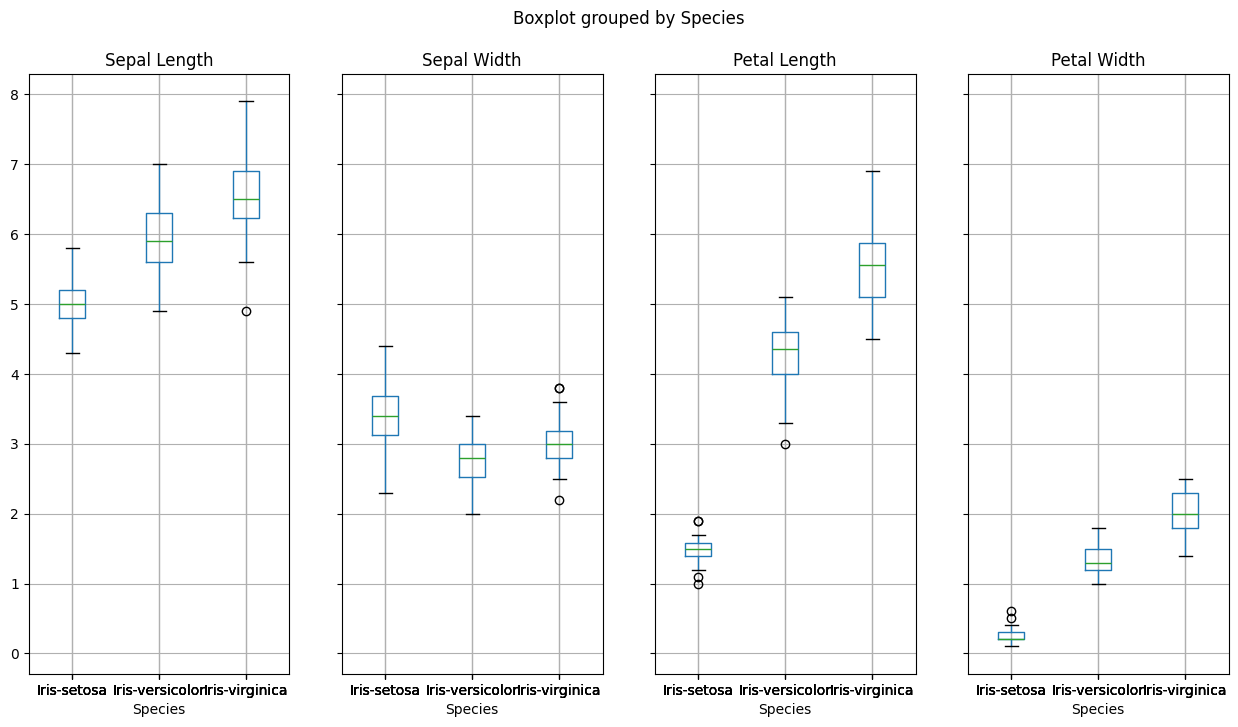

In [10]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species', figsize=(15,8), layout=(1,4));

Plot pairwise relationships using method `seaborn.pairplot`. 
See https://seaborn.pydata.org/generated/seaborn.pairplot.html

<Figure size 800x800 with 0 Axes>

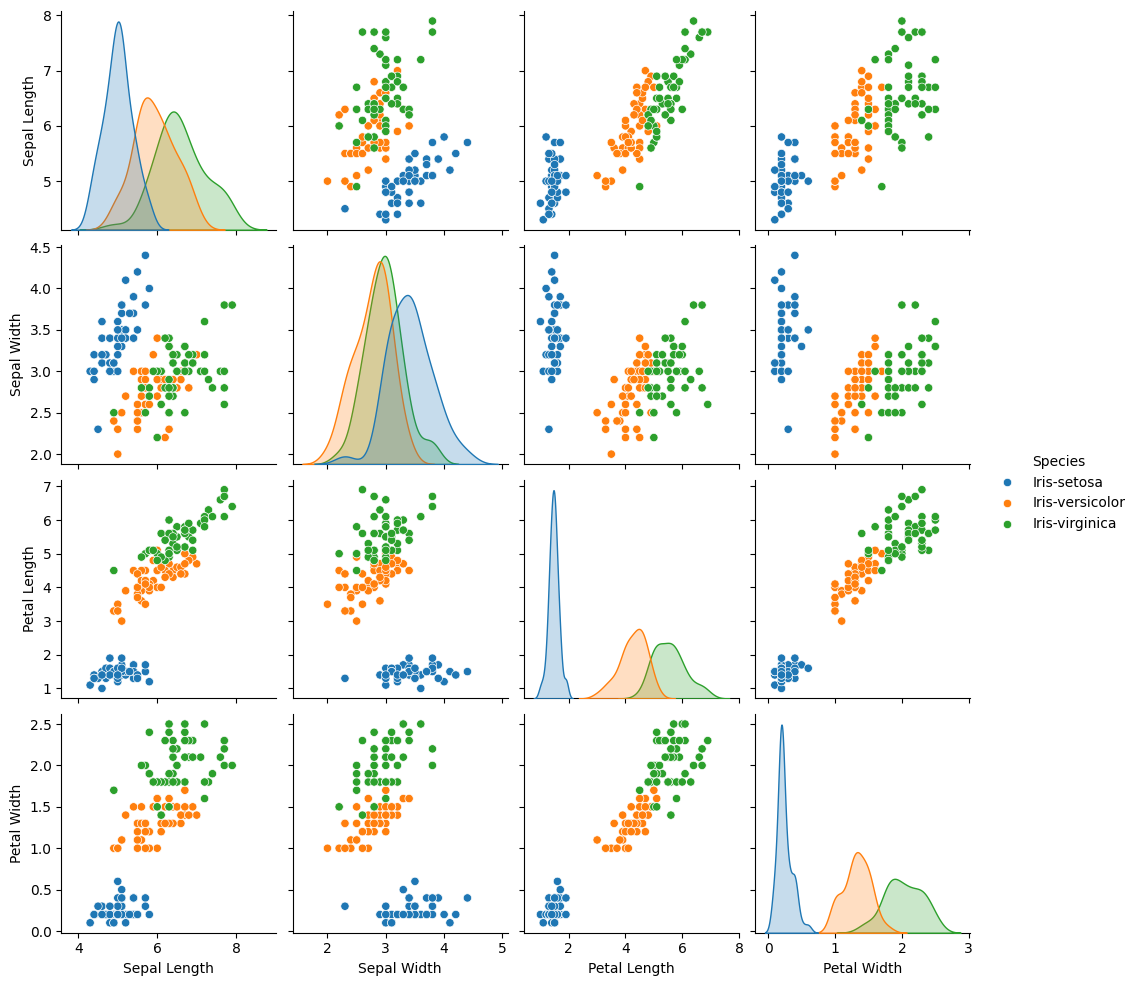

In [11]:
plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris, hue='Species')
plt.show

## 💡 Feature selection
Use all 4 features for clustering. 
From the box plots it can be observed that the values range between 0 and 8 cm and that the distribution 
differs per feature. 
For instance, Sepal Length ranges between 4 and 8 cm, while Petal Width ranges between 0 and 3 cm. 
When applying K-means clustering it is important to normalize the data. Using the `StandardScaler`, 
the standard score of a sample $x$ is calculated as $z=(x-u)/s$, where $u$ is the mean and $s$ is 
the standard deviation.

In [113]:
from sklearn.preprocessing import StandardScaler

# Define X_iris and y_iris
X_iris = df_iris[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
y_iris = df_iris['Species']

# Create an array of information for each case
case_info = [
    {'features': ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], 'normalize': False},
    {'features': ['Sepal Length', 'Sepal Width'], 'normalize': False},
    {'features': ['Petal Length', 'Petal Width'], 'normalize': False}
]

# Initialize an empty list to store the resulting arrays
resulting_arrays = []

# Iterate over each case
for info in case_info:
    selected_features = info['features']
    X_iris_case = df_iris[selected_features]

    # Normalize the data if needed
    if info['normalize']:
        scaler_iris = StandardScaler().fit(X_iris_case)
        X_iris_normalized = scaler_iris.transform(X_iris_case)
    else:
        X_iris_normalized = X_iris_case.to_numpy()

    # Reshape X_iris_normalized into a 3x3 array
    # X_iris_3x3 = np.reshape(X_iris_normalized, (3, 3))
    
    # Append the resulting array to the list
    resulting_arrays.append(X_iris_normalized)

for i, array in enumerate(resulting_arrays):
    print(f"Array for case {i}:\n{array}\n")

Array for case 0:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

Visualize the distribution of the data per feature after normalization.

Number of selected features for case 0: 4
0
1
2
3


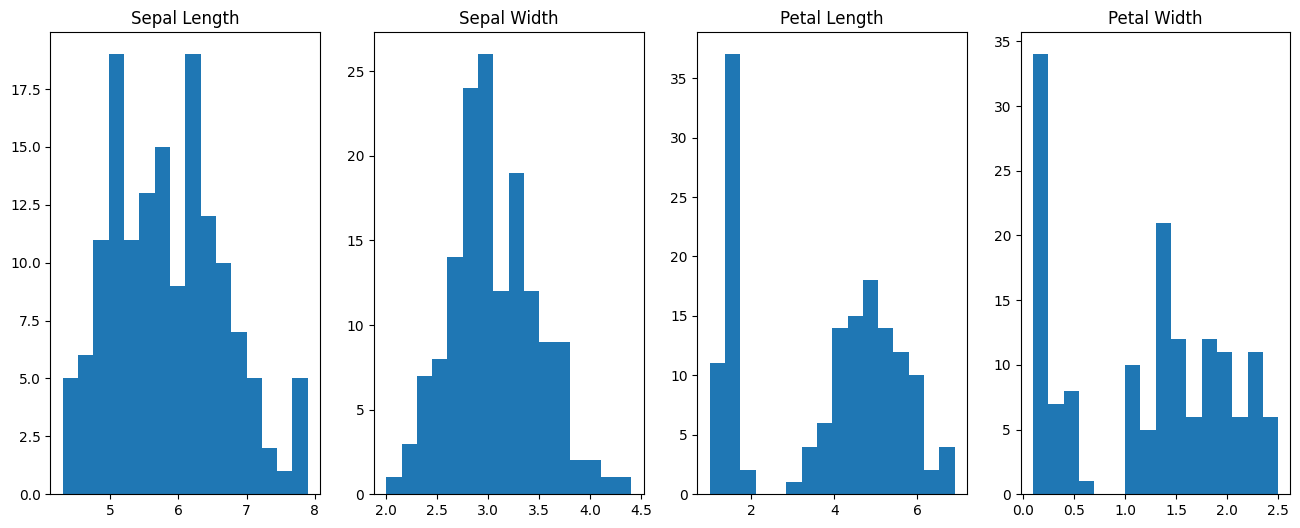

Number of selected features for case 1: 2
0
1


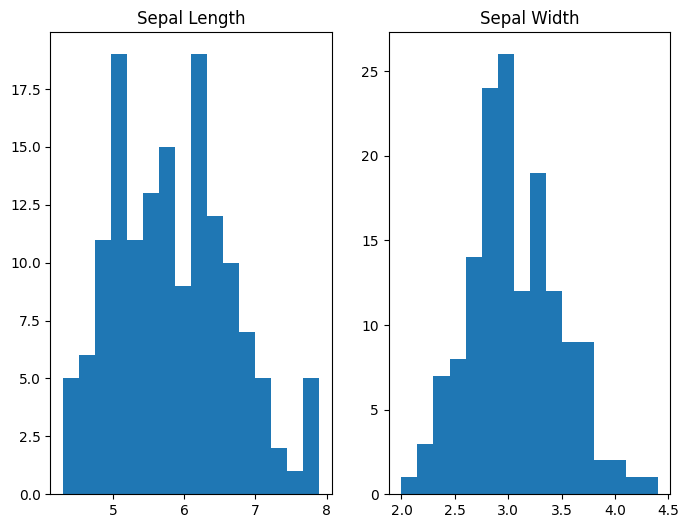

Number of selected features for case 2: 2
0
1


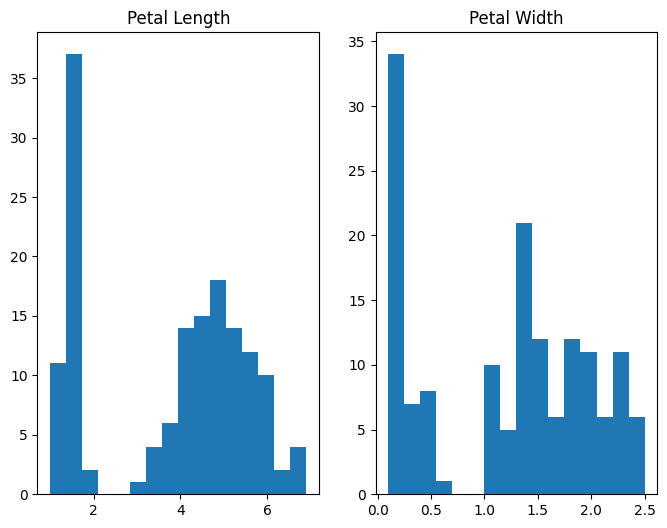

In [114]:
# Define number of bins for histogram
nbins = 16
for i, array in enumerate(resulting_arrays):

    # Number of selected features
    nfeatures = len(case_info[i]['features'])
    print(f"Number of selected features for case {i}: {nfeatures}")

    # Plot histograms for each of the selected features
    fig, axs = plt.subplots(1, nfeatures, figsize=(nfeatures * 4, 6))
    for feature in range(nfeatures):
        print(feature)
        axs[feature].hist(array[:, feature], nbins)
        axs[feature].set_title(case_info[i]['features'][feature])  # Use the correct feature name

    plt.show()

## 🪓 Splitting into train/test

It's important here to realize that we do not split the data into train and test data. Clustering is (primarily) unsupervised, so we do not split the data into train and test.

# Modelling
To perform hierarchical clustering, we use `sklearn.cluster.AgglomerativeClustering`. 

See https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [115]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler

agglom = []
for i, array in enumerate(resulting_arrays):
    # Define number of clusters by setting distance threshold
    agglom_append = AgglomerativeClustering(distance_threshold=10, n_clusters=None)

    # Use this line for agglomerative clustering using normalized data
    agglom_append.fit(array)

    agglom.append(agglom_append)

kmean_array = []

for i, array in enumerate(resulting_arrays):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(array)

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(scaled_data)
    
    kmean_array.append(kmeans)

DBSCAN_array = []

for i, array in enumerate(resulting_arrays):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(array)

    dbscan = DBSCAN(eps=0.45)
    dbscan.fit(scaled_data)  

    DBSCAN_array.append(dbscan)

HDBSCAN_array = []

for i, array in enumerate(resulting_arrays):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(array)

    dbscan = HDBSCAN(n_jobs=-1, cluster_selection_epsilon = 0.18)
    dbscan.fit(scaled_data)  

    HDBSCAN_array.append(dbscan)

Number of clusters found by the algorithm. If parameter `distance_threshold=None`, it will
be equal to the given `n_clusters`.

In [116]:
print('agglom:')
for agg in agglom:
    print('Number of clusters: ', agg.n_clusters_)

print('\nkmean:')
for kmean in kmean_array:
    print('Number of clusters: ', kmean.n_clusters)

print('\nDBSCAN:')
for DBscan in DBSCAN_array:
    print('Number of clusters: ', len(np.unique(DBscan.labels_)))

print('\nHDBSCAN:')
for HDBscan in HDBSCAN_array:
    print('Number of clusters: ', len(np.unique(HDBscan.labels_)))



agglom:
Number of clusters:  3
Number of clusters:  2
Number of clusters:  3

kmean:
Number of clusters:  3
Number of clusters:  3
Number of clusters:  3

DBSCAN:
Number of clusters:  4
Number of clusters:  3
Number of clusters:  2

HDBSCAN:
Number of clusters:  3
Number of clusters:  3
Number of clusters:  2


Cluster labels are stored in an ndarray of shape (n_samples).

In [117]:
for agg in agglom:
    print(np.unique(agg.labels_))

for kmean in kmean_array:
    print(np.unique(kmean.labels_))

for DBscan in DBSCAN_array:
    print(np.unique(DBscan.labels_))

for HDBscan in HDBSCAN_array:
    print(np.unique(HDBscan.labels_))

[0 1 2]
[0 1]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[-1  0  1  2]
[-1  0  1]
[0 1]
[-1  0  1]
[-1  0  1]
[0 1]


Number of leaves in the hierarchical tree.

In [118]:
for agg in agglom:
    print(agg.n_leaves_)

for kmean in kmean_array:
    print(kmean.n_features_in_)

for DBscan in DBSCAN_array:
    print(DBscan.n_features_in_)

150
150
150
4
2
2
4
2
2


In [119]:
for agg in agglom:
    print(agg.distances_)

for kmean in kmean_array:
    print(kmean.inertia_)

for DBscan in DBSCAN_array:
    print(DBscan.components_)

for HDBscan in HDBSCAN_array:
    print(HDBscan.probabilities_)

[ 0.          0.          0.          0.1         0.1         0.1
  0.1         0.14142136  0.14142136  0.14142136  0.14142136  0.14142136
  0.14142136  0.14142136  0.14142136  0.14142136  0.14142136  0.14142136
  0.14142136  0.14142136  0.14142136  0.17320508  0.17320508  0.17320508
  0.17320508  0.17320508  0.17320508  0.18257419  0.18257419  0.2
  0.2         0.2         0.2         0.21602469  0.21602469  0.2236068
  0.2236068   0.24494897  0.24494897  0.24494897  0.24494897  0.24494897
  0.24494897  0.24494897  0.25819889  0.26457513  0.26457513  0.26457513
  0.26457513  0.26457513  0.27080128  0.28284271  0.28982753  0.29439203
  0.29439203  0.29439203  0.29439203  0.30550505  0.31358146  0.31622777
  0.32145503  0.33166248  0.33166248  0.33166248  0.33665016  0.34156503
  0.34641016  0.34641016  0.34778209  0.35118846  0.35182066  0.35355339
  0.35823642  0.36055513  0.36285902  0.36968455  0.37416574  0.37416574
  0.4         0.41231056  0.41231056  0.41472883  0.42229532  0.43

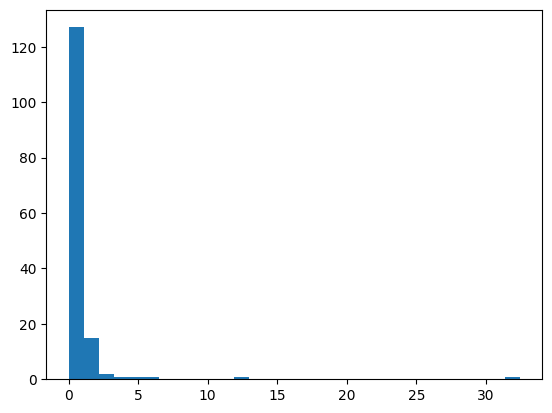

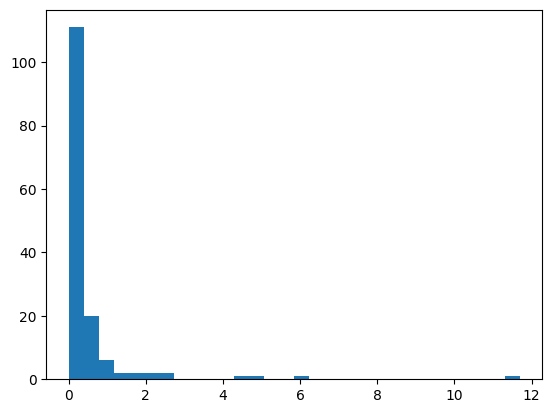

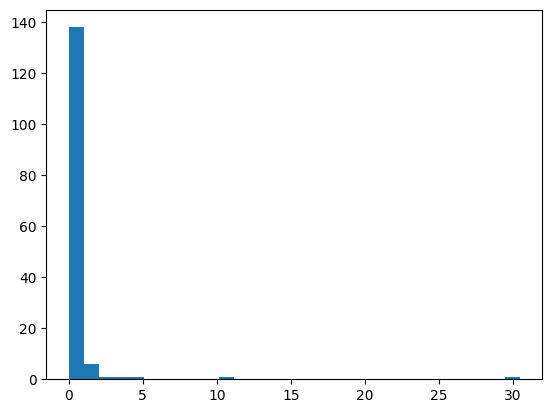

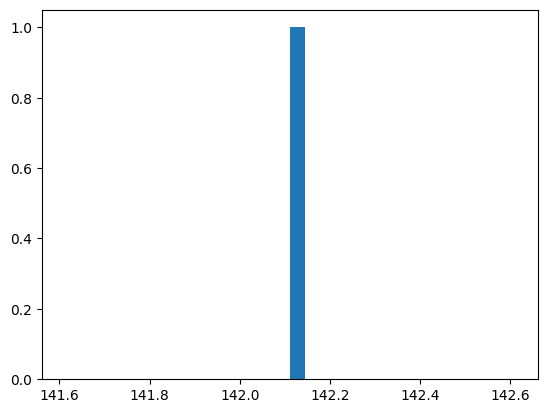

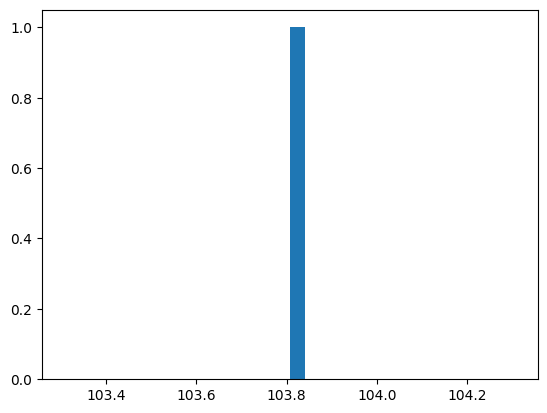

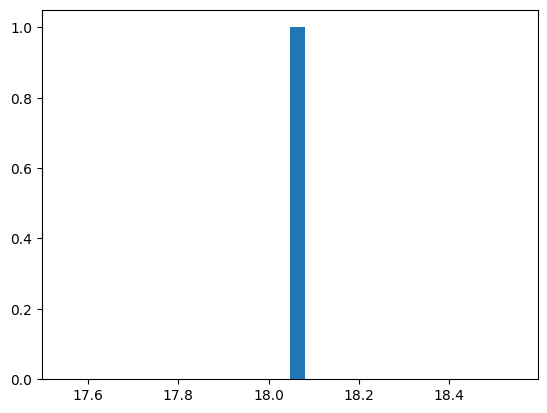

In [120]:
for agg in agglom:
    plt.hist(agg.distances_,30)
    plt.show()

for kmean in kmean_array:
    plt.hist(kmean.inertia_,30)
    plt.show()

Plot hierarchical clustering dendrogram.

The code below is adapted from
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

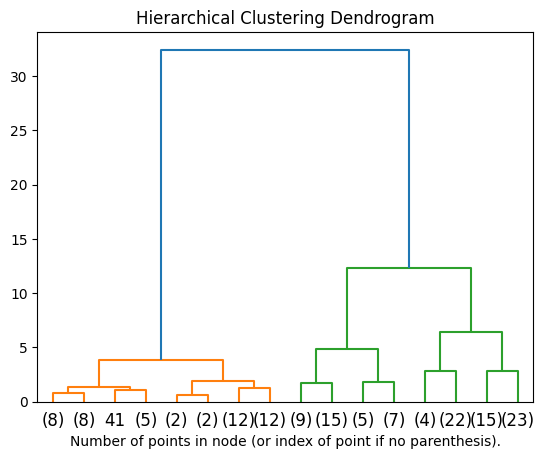

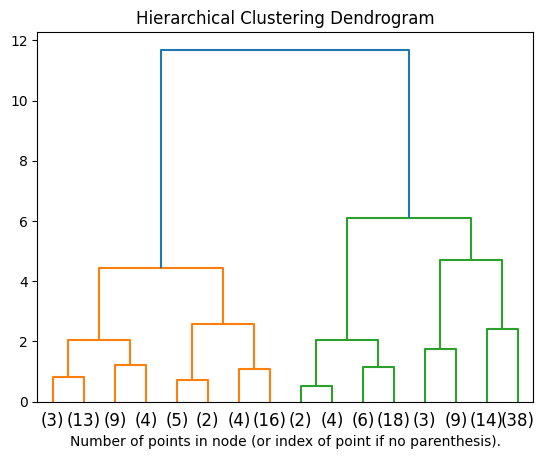

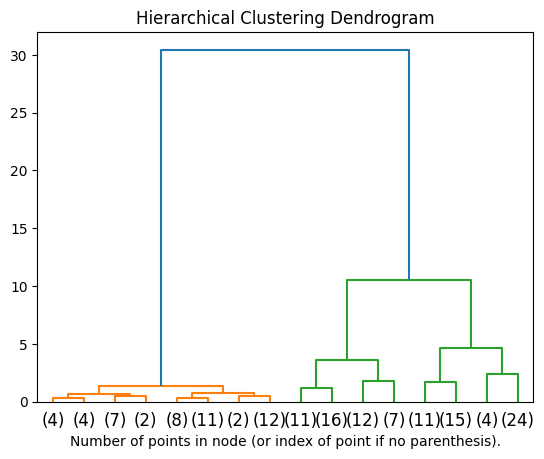

In [121]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

for agg in agglom:
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(agg, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

# Inference
For each datapaint, add the cluster to the original Iris data set.

In [122]:
for i, agg in enumerate(agglom):
    df_iris[F'Cluster {i}'] = agg.labels_.astype(str)
    df_iris[F'Cluster {i}'] = 'Cluster ' + df_iris[F'Cluster {i}']

for kmean in kmean_array:
    i += 1
    df_iris[F'Cluster {i}'] = kmean.labels_.astype(str)
    df_iris[F'Cluster {i}'] = 'Cluster ' + df_iris[F'Cluster {i}']

for DBscan in DBSCAN_array:
    i += 1
    df_iris[F'Cluster {i}'] = DBscan.labels_.astype(str)
    df_iris[F'Cluster {i}'] = 'Cluster ' + df_iris[F'Cluster {i}']
    
for HDBscan in HDBSCAN_array:
    i += 1
    df_iris[F'Cluster {i}'] = HDBscan.labels_.astype(str)
    df_iris[F'Cluster {i}'] = 'Cluster ' + df_iris[F'Cluster {i}']

display(df_iris.head(5))

clusterattampts = i;

Sepal Length  Sepal Width  Petal Length  Petal Width      Species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  \
0  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 2  Cluster 1   
1  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 2  Cluster 1   
2  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 2  Cluster 1   
3  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 2  Cluster 1   
4  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 2  Cluster 1   

   Cluster 6  Cluster 7  Cluster 8  Cluster 9 Cluster 10 Cluster 11  
0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  
1  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  
2  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  
3  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  
4  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0

In [123]:
display(df_iris.tail(5))

Sepal Length  Sepal Width  Petal Length  Petal Width         Species  \
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  \
145  Cluster 2  Cluster 0  Cluster 0  Cluster 2  Cluster 1  Cluster 0   
146  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0  Cluster 0   
147  Cluster 2  Cluster 0  Cluster 0  Cluster 2  Cluster 1  Cluster 0   
148  Cluster 2  Cluster 0  Cluster 0  Cluster 2  Cluster 1  Cluster 0   
149  Cluster 0  Cluster 0  Cluster 0  Cluster 2  Cluster 0  Cluster 0   

      Cluster 6  Cluster 7  Cluster 8  Cluster 9 Cluster 10 Cluster 11  
145   Cluster 2  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 1  
146  Cluster -1  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 1  
147   Cluster 2  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 1  
148  Cluster -1  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 1  
149  Cluster -1  Cluster 1  Cluster 1  Cluster 1  Cluster 1  Cluster 1

Plot pairwise relationships per species and per cluster using method `seaborn.pairplot`. 

<Figure size 800x800 with 0 Axes>

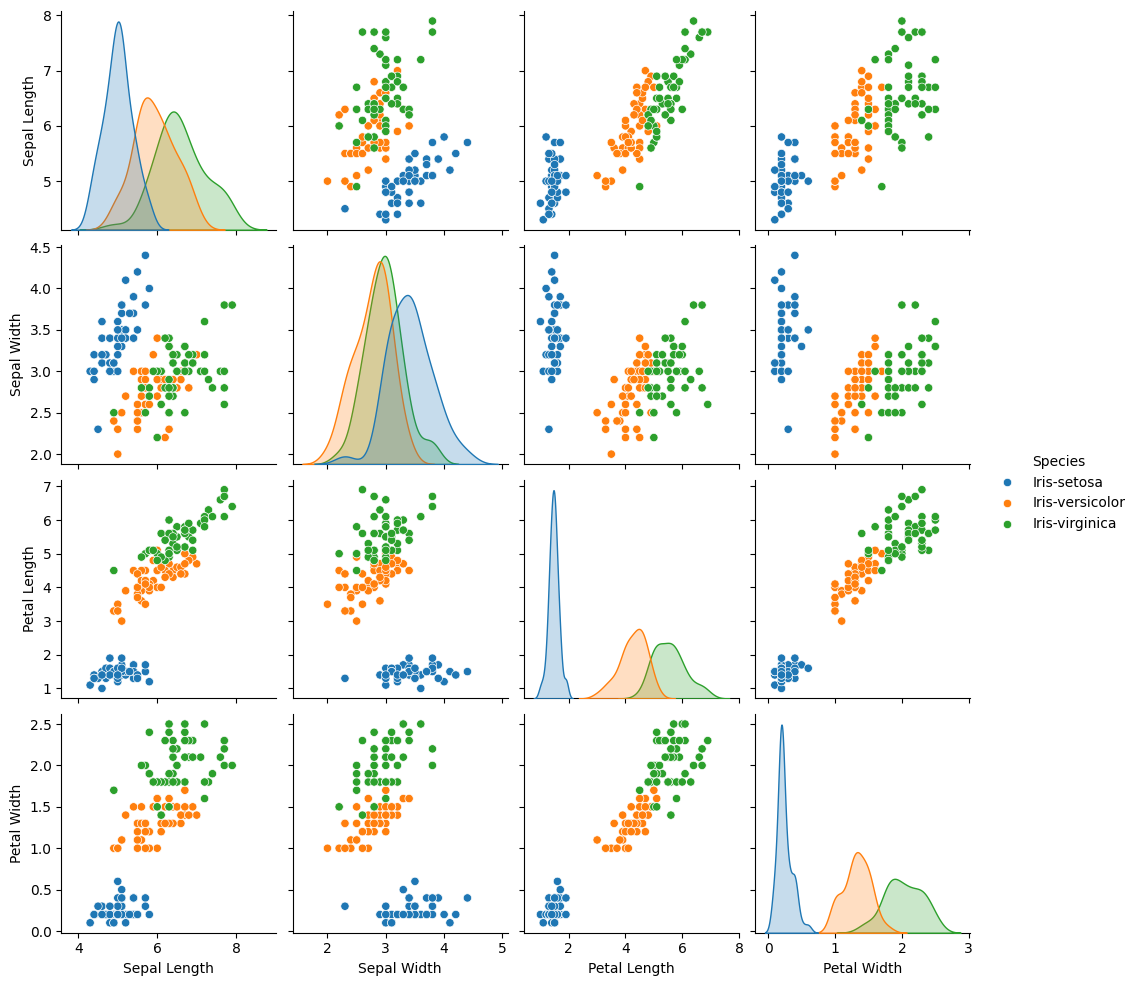

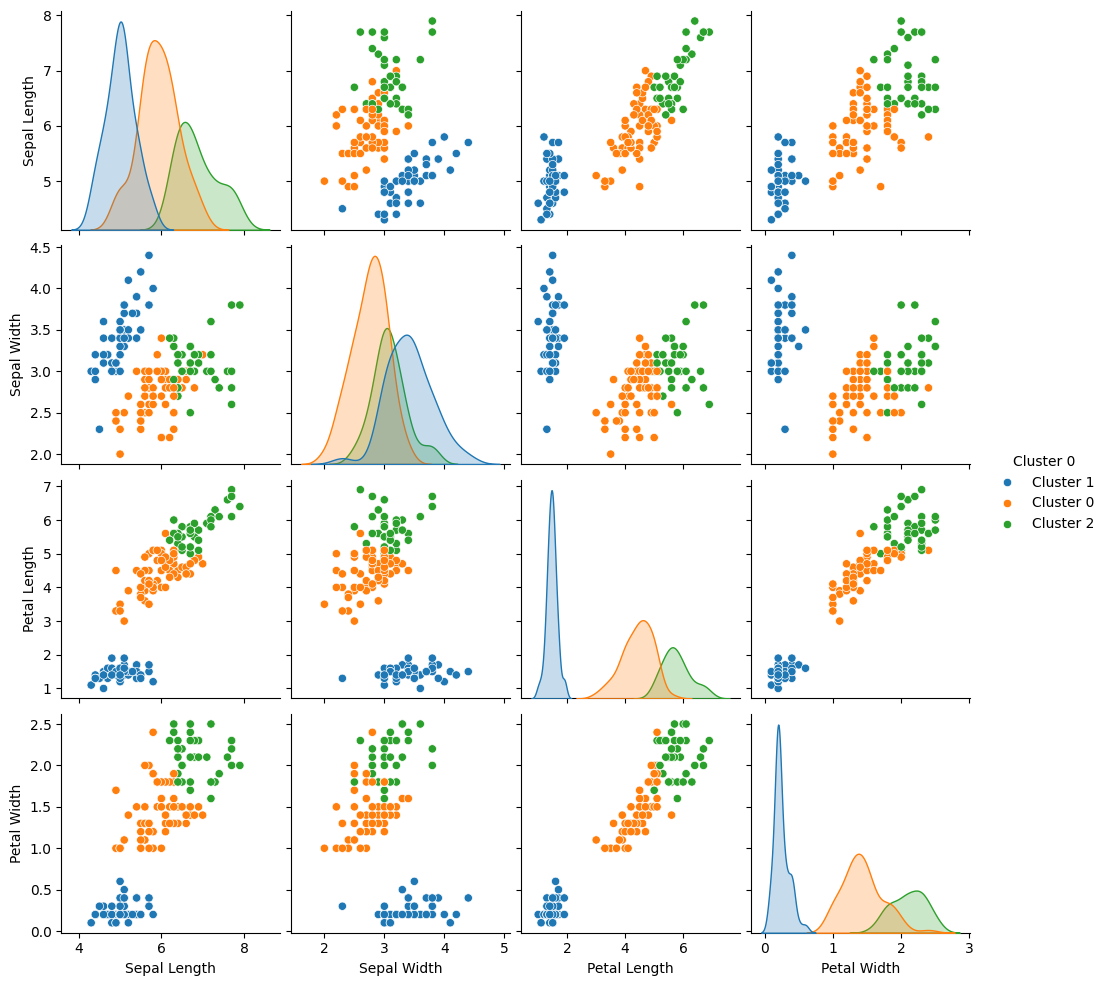

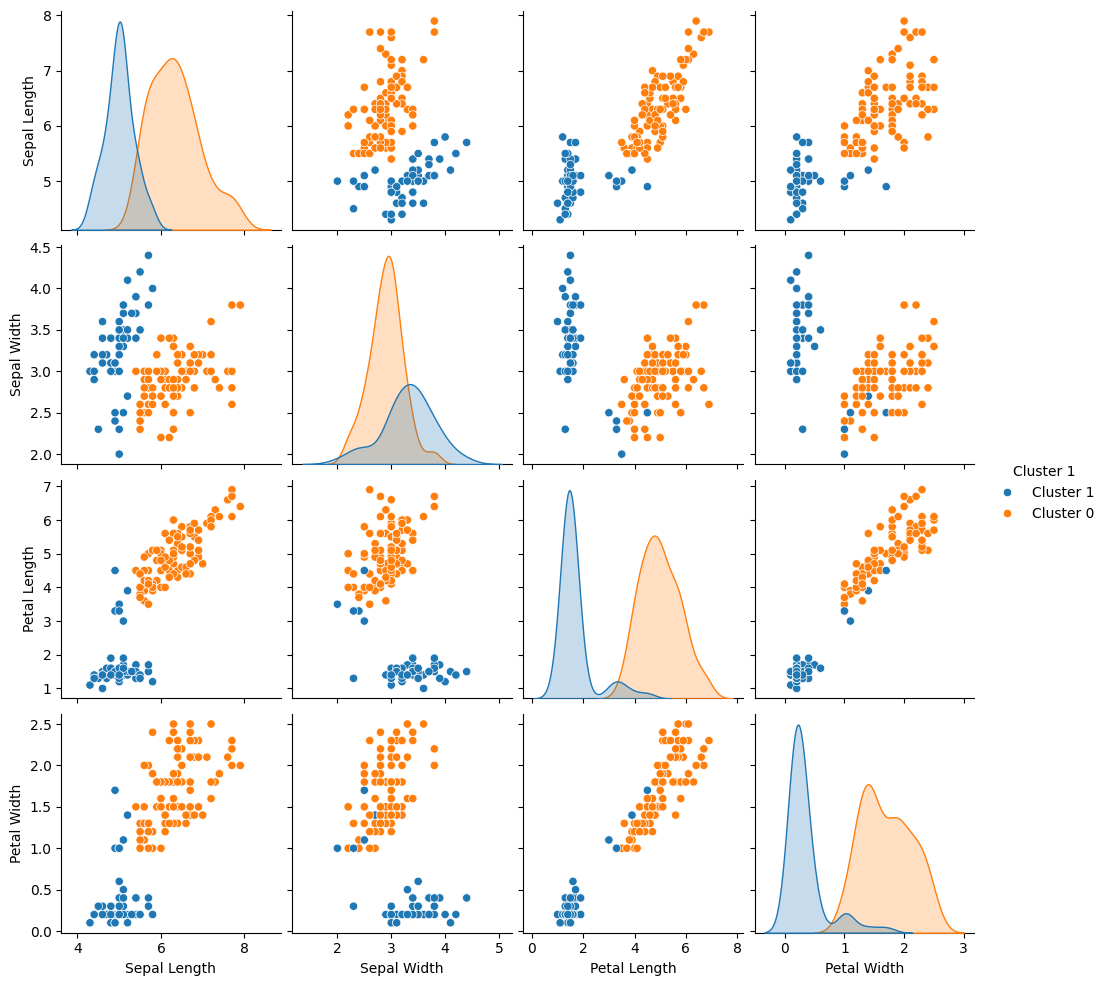

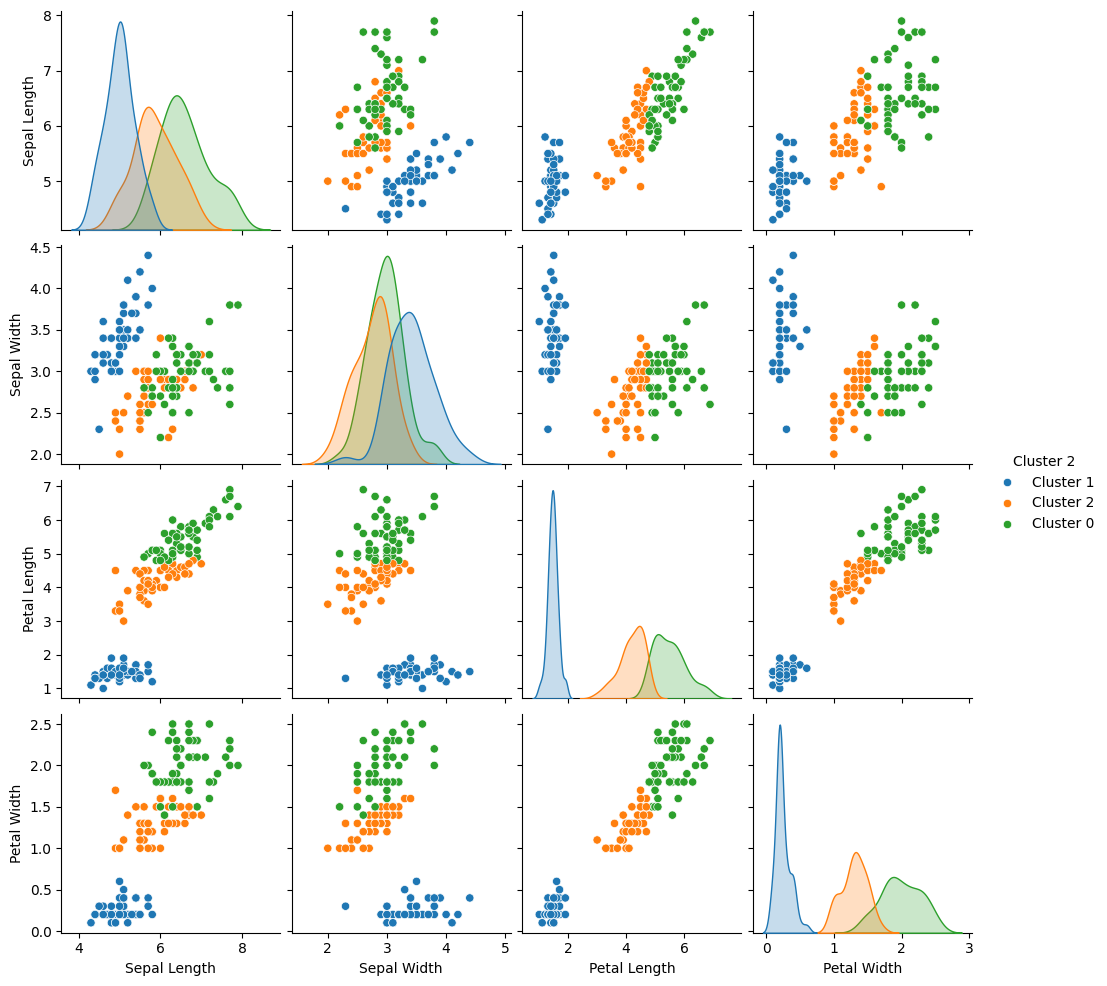

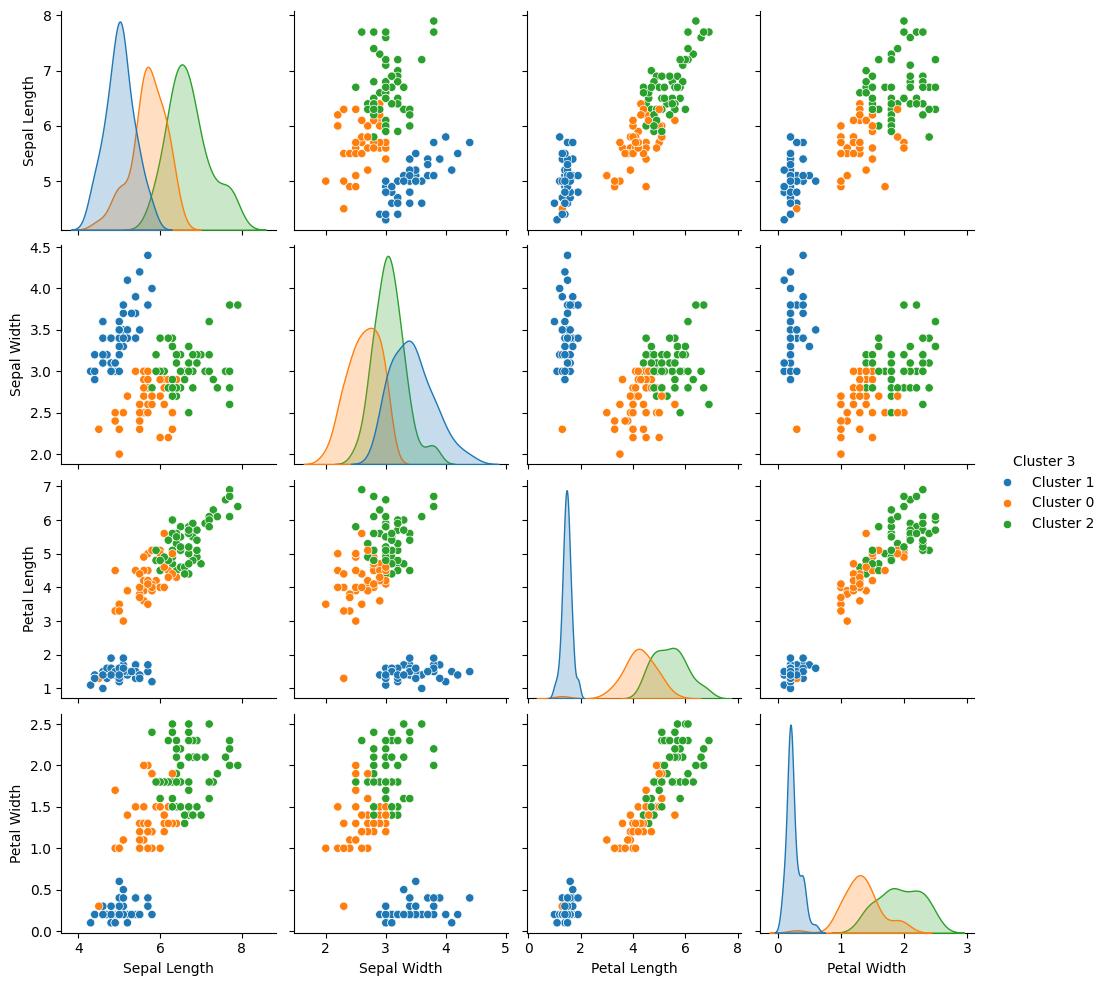

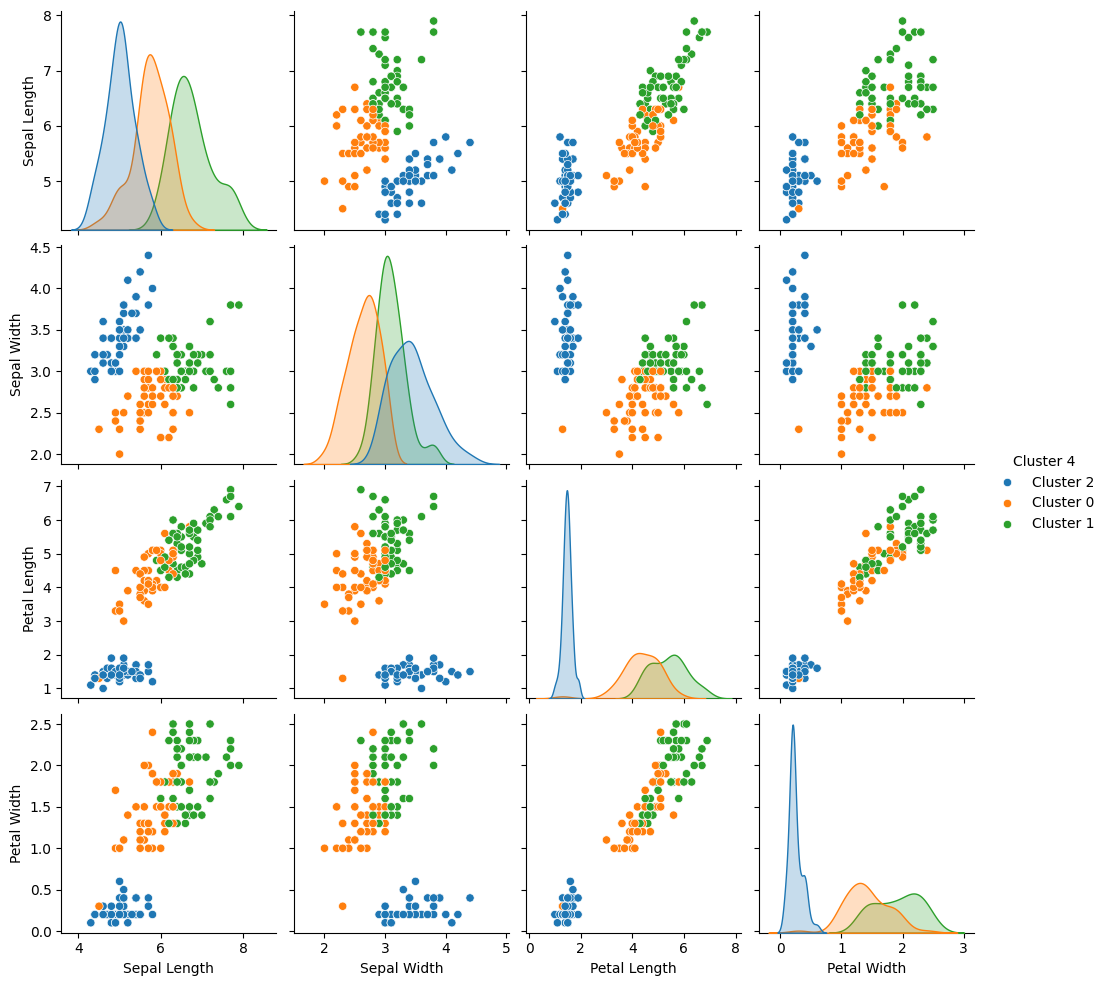

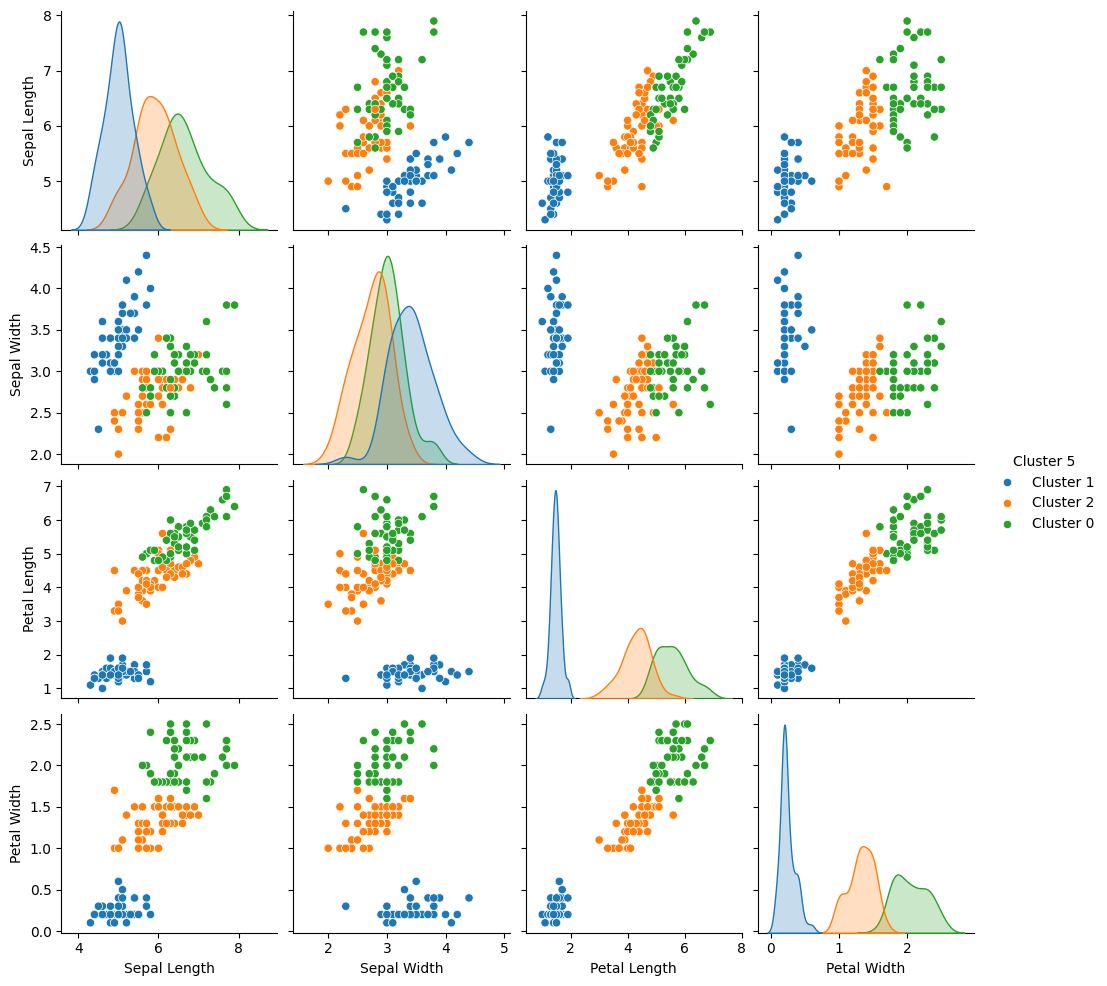

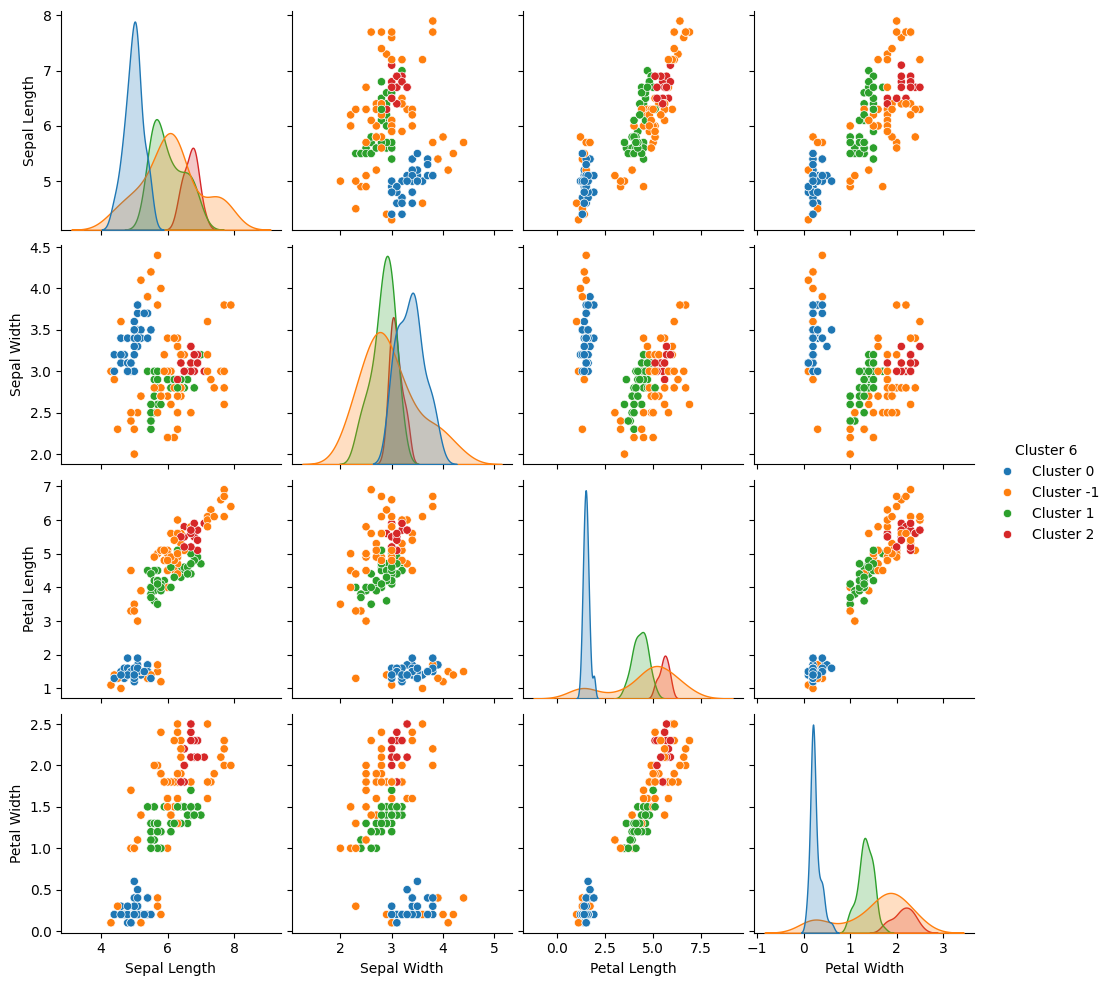

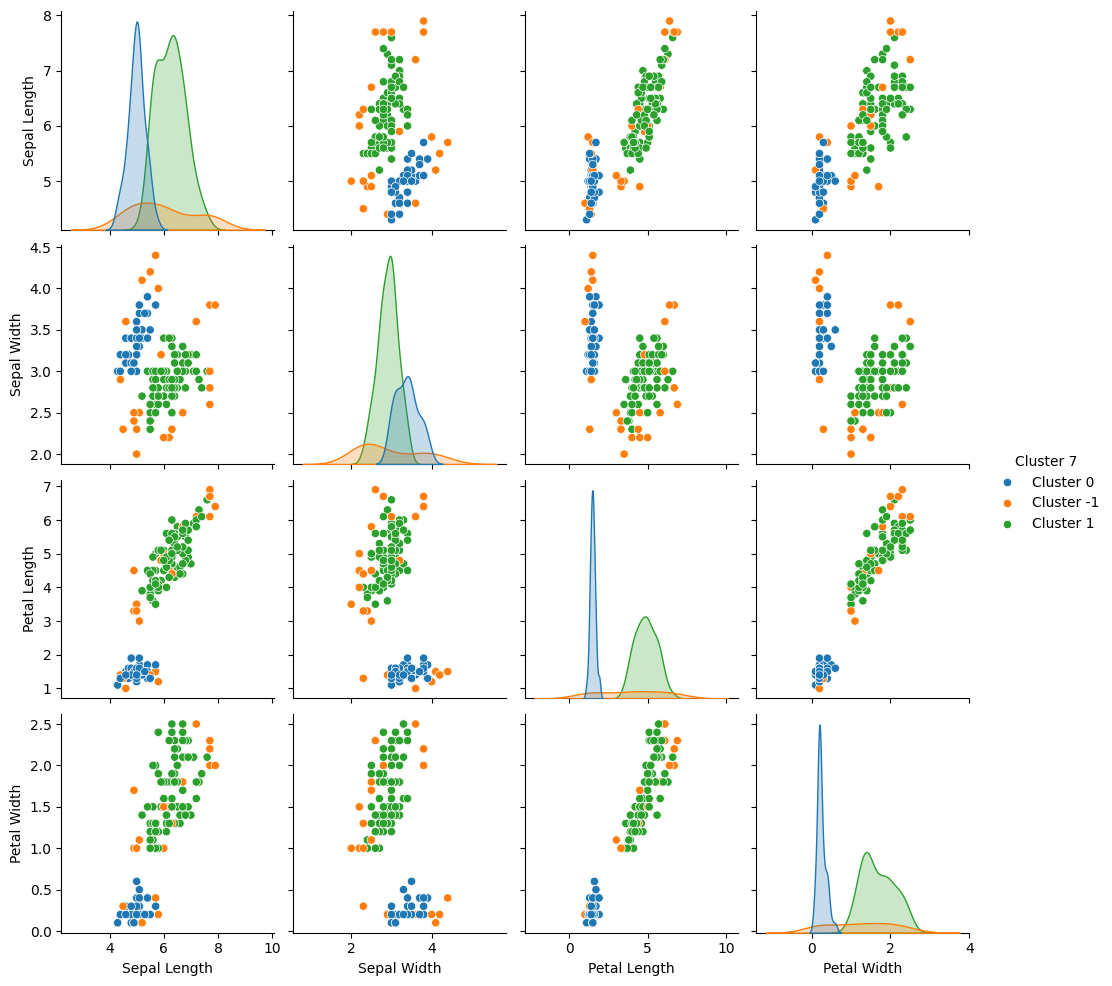

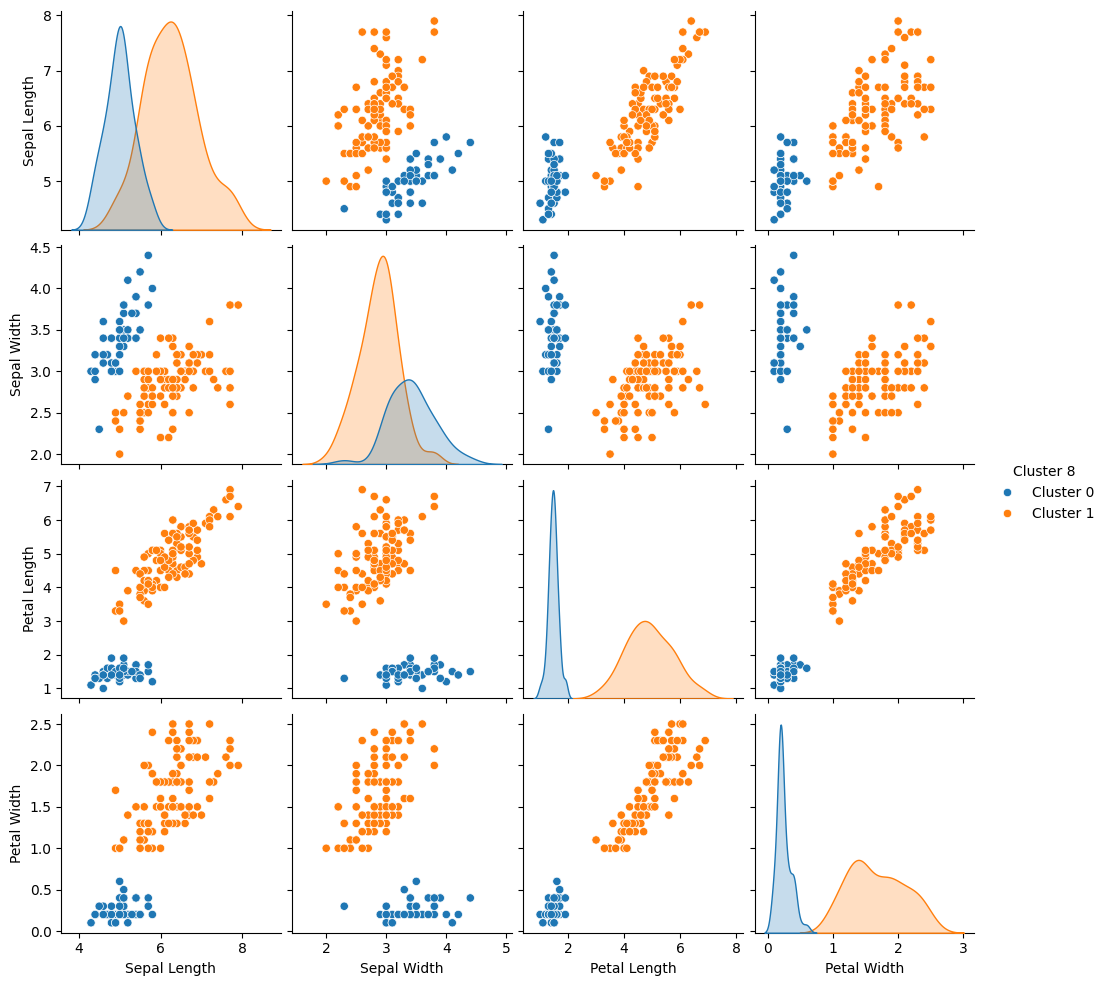

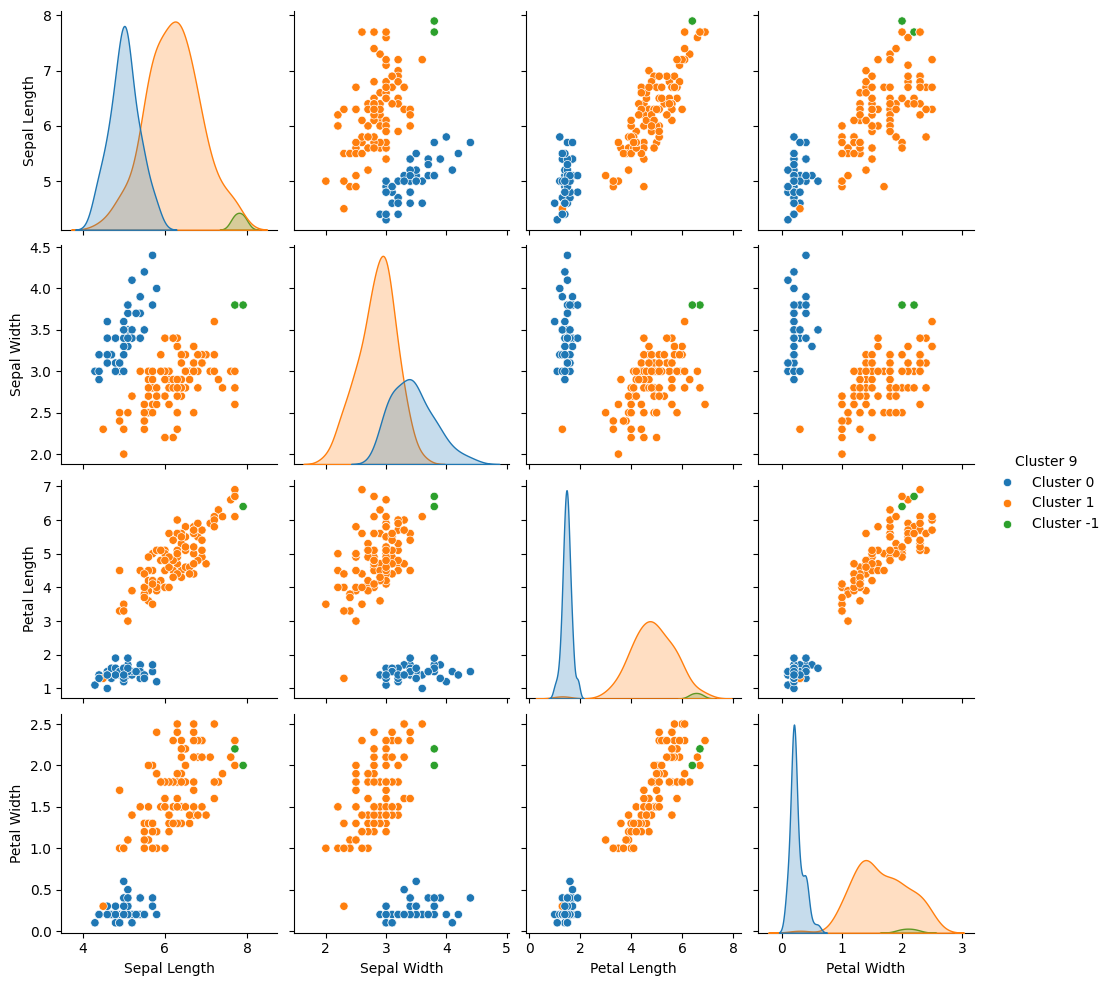

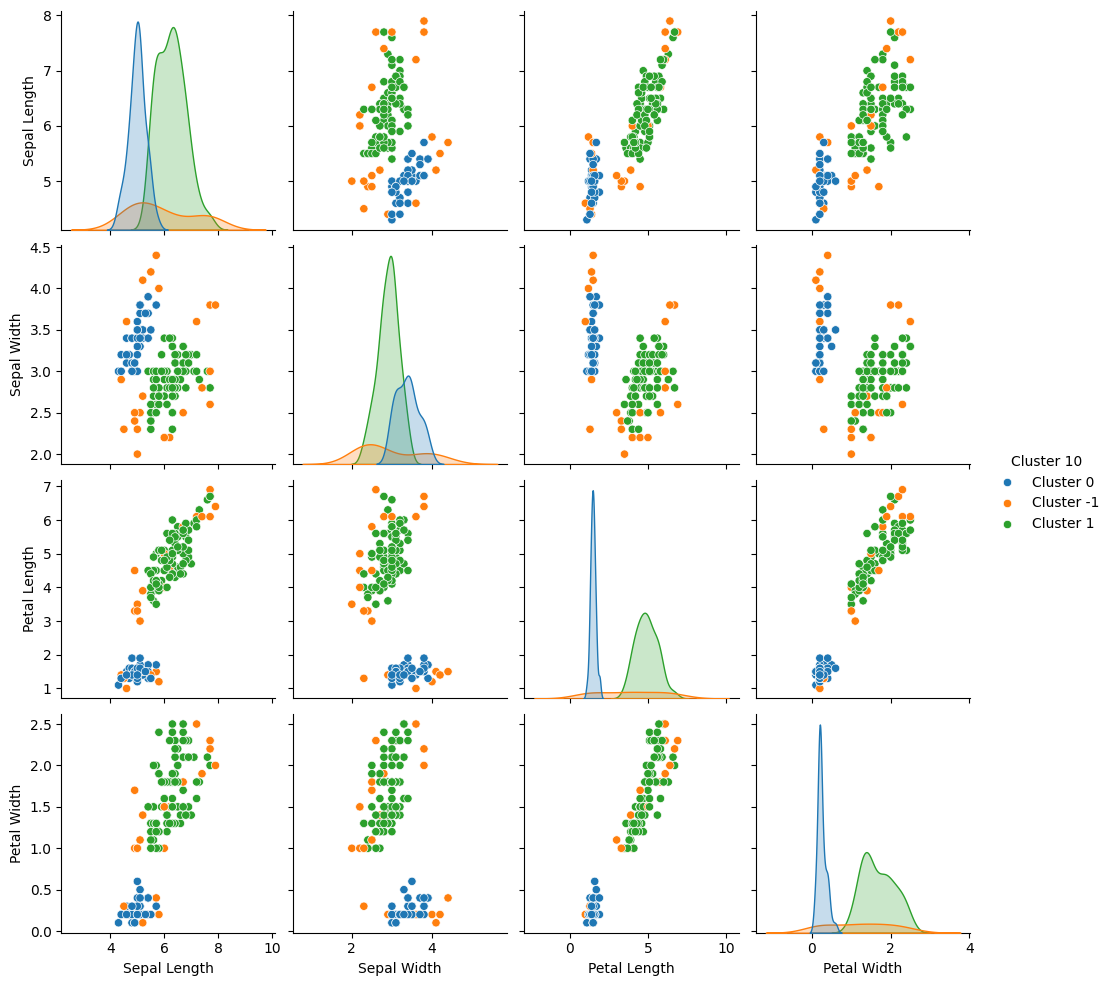

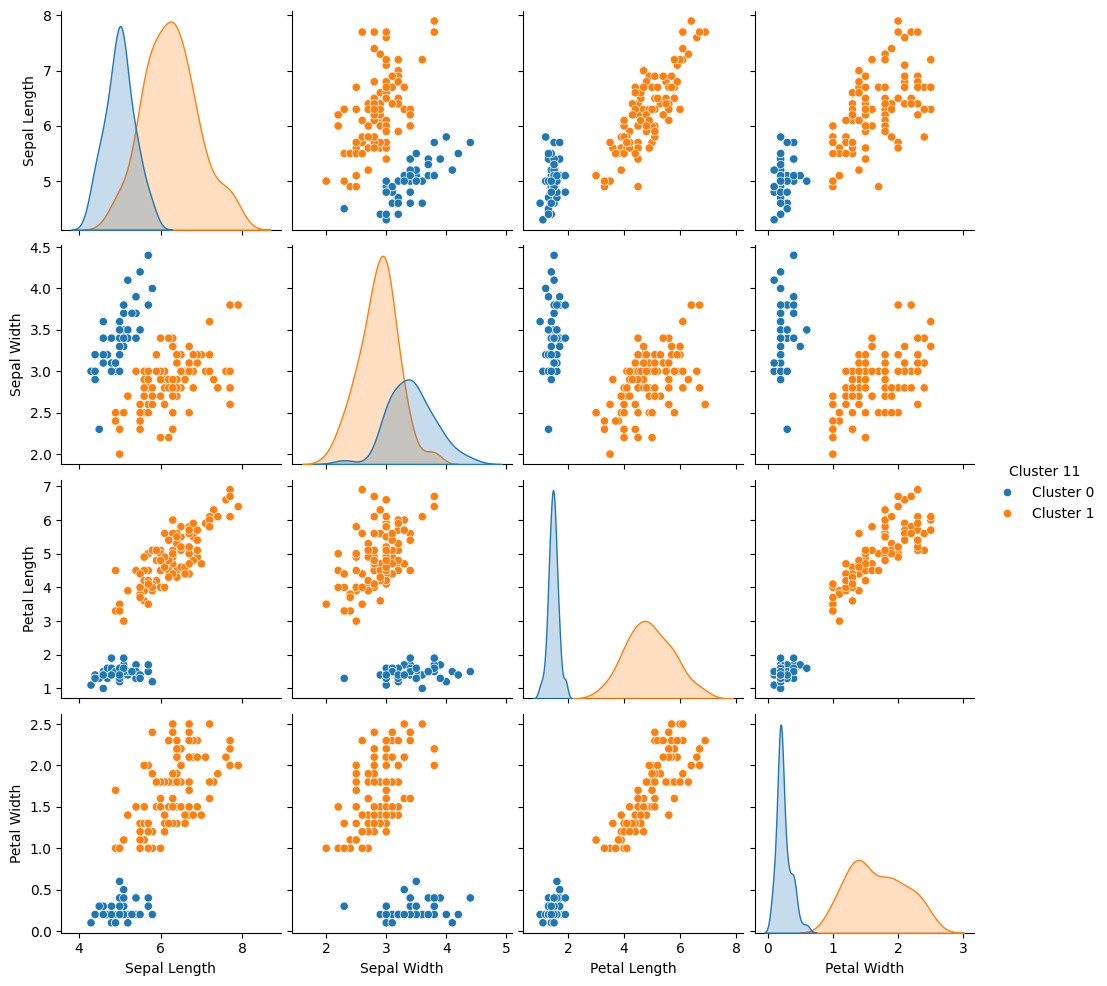

'for i in range(clusterattampts + 1):\n    plt.figure(figsize=(8,8))\n    ax = sns.pairplot(df_iris[["Sepal Length","Sepal Width","Petal Length","Petal Width", F\'Cluster {i}\']], hue=F\'Cluster {i}\')\n    plt.show'

In [125]:
plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris[["Sepal Length","Sepal Width","Petal Length","Petal Width","Species"]], hue="Species")
plt.show

for i in range(clusterattampts + 1):
    sns.pairplot(df_iris[["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", f"Cluster {i}"]], hue=f"Cluster {i}")

# plt.tight_layout()
plt.show()



'''for i in range(clusterattampts + 1):
    plt.figure(figsize=(8,8))
    ax = sns.pairplot(df_iris[["Sepal Length","Sepal Width","Petal Length","Petal Width", F'Cluster {i}']], hue=F'Cluster {i}')
    plt.show'''

# Evaluation
If clustering is successful, one may expect that flowers of the same species end up in the same cluster.
Let us check whether this is the case.

Code for the bar plot is adapted from
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

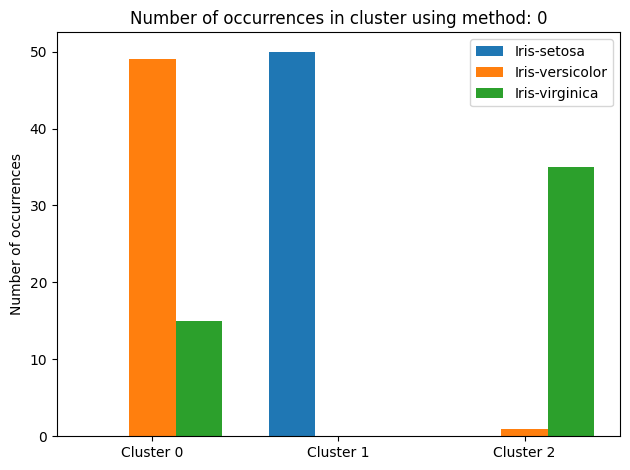

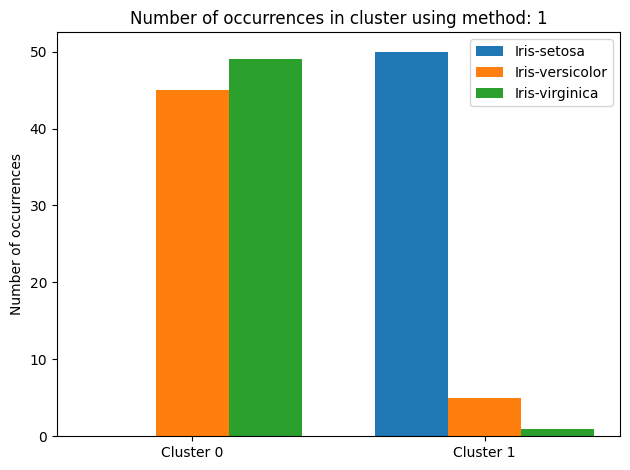

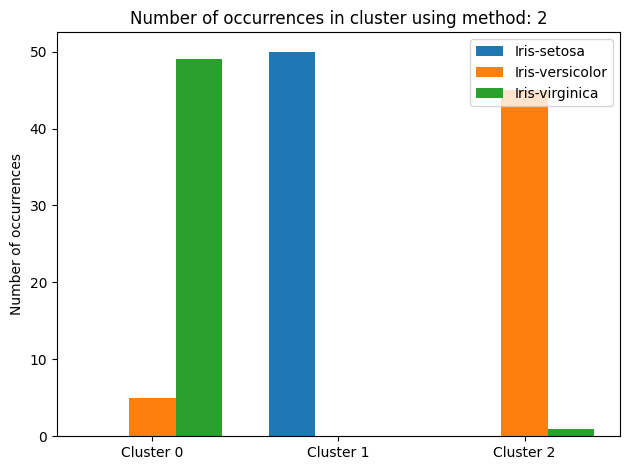

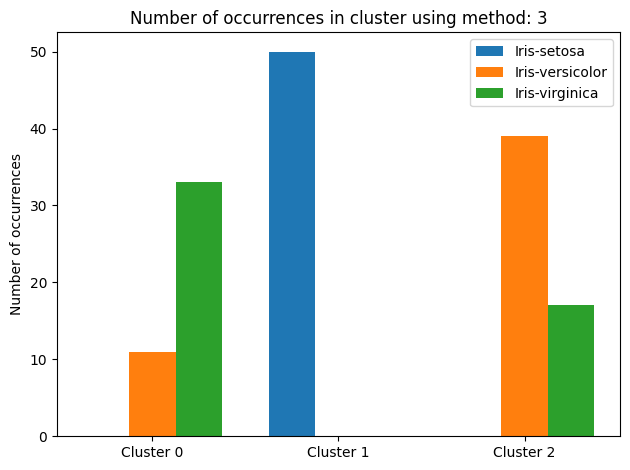

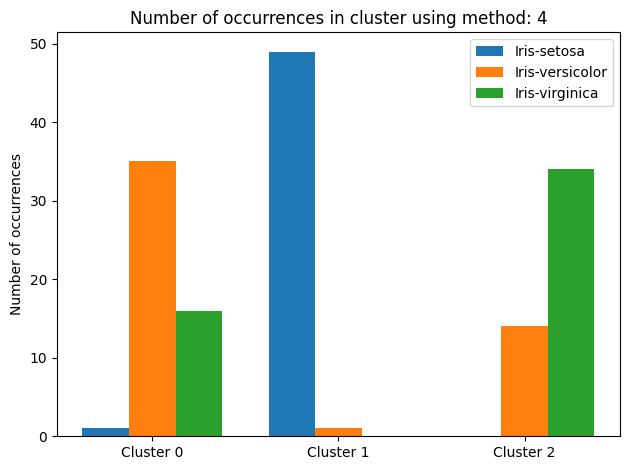

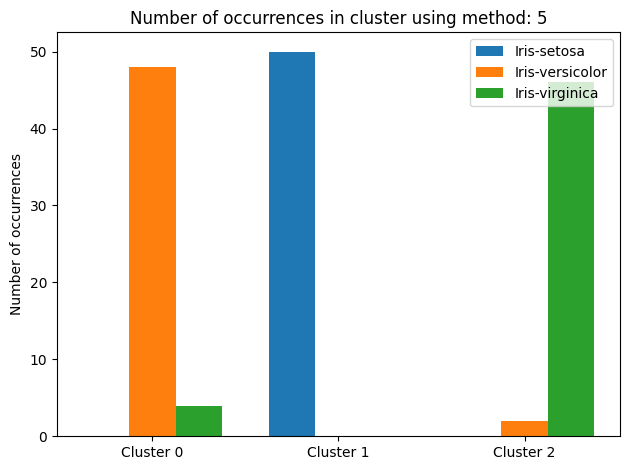

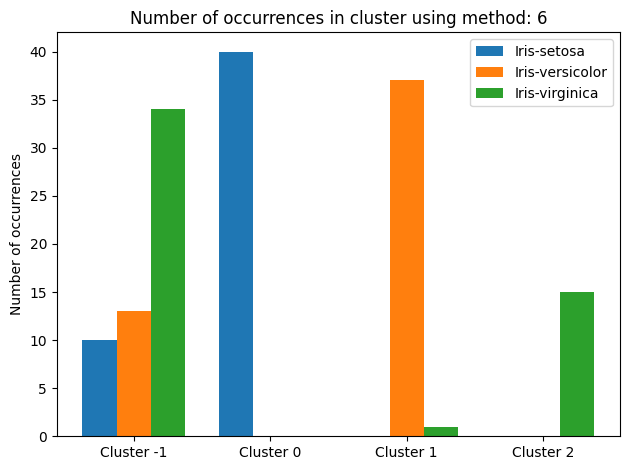

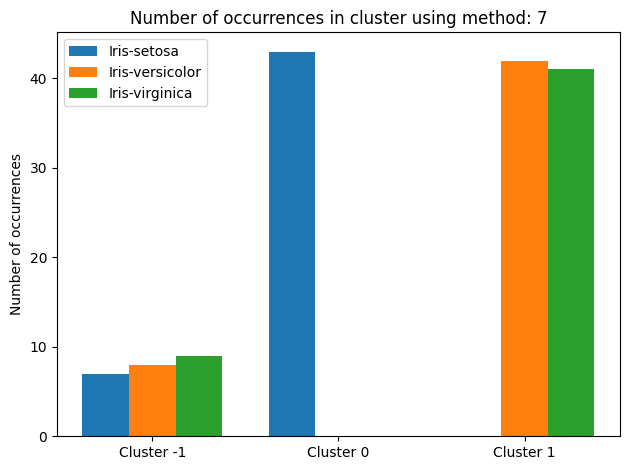

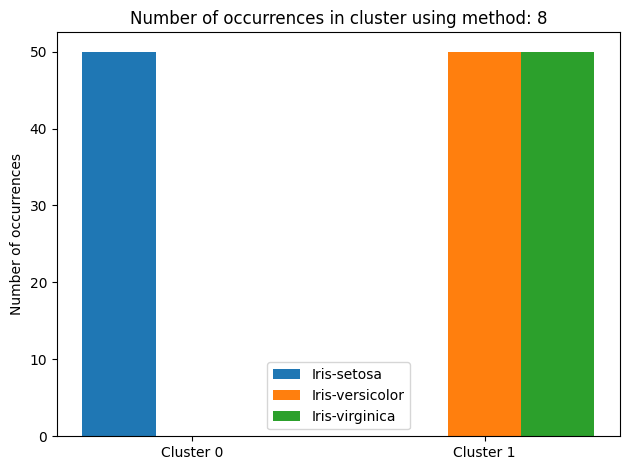

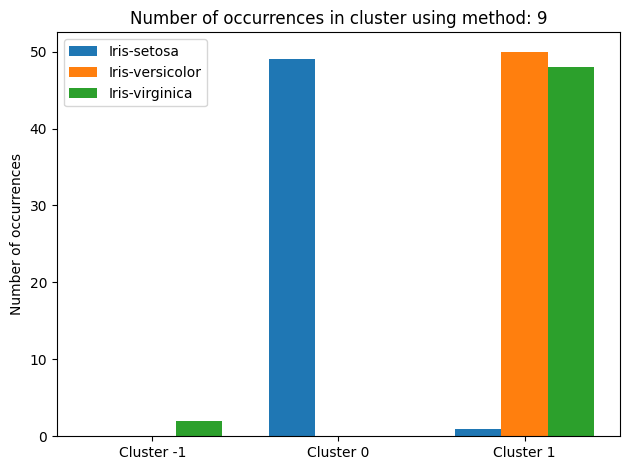

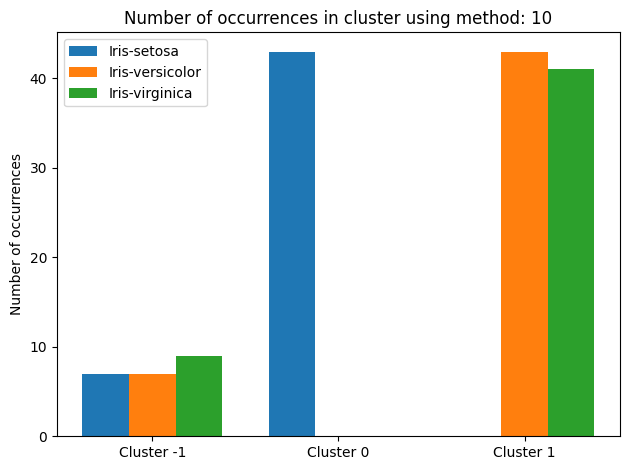

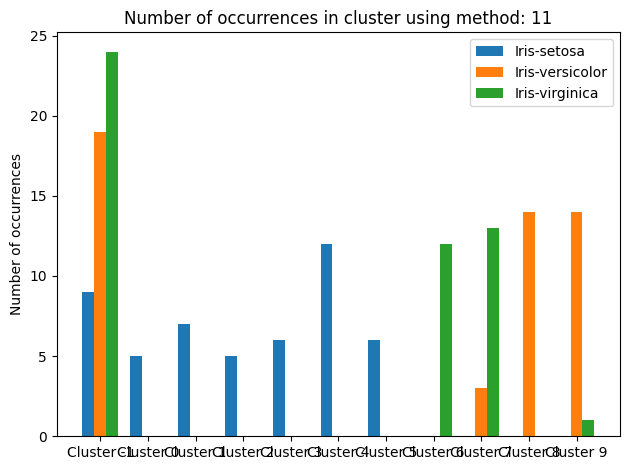

In [60]:
# Define labels for species
species = df_iris['Species'].unique()

for i in range(0, clusterattampts + 1):
    # Define labels for clusters
    clusters = df_iris[F'Cluster {i}'].unique()

    # Sort cluster names in alphabetical order, i.e.,
    # Cluster 0, Cluster 1, Cluster 2, etc.
    clusters.sort()

    # Determine the location for cluster labels 
    x = np.arange(len(clusters))

    # Define the width of the bars
    width = 0.25

    # Create the bar plot
    fig, ax = plt.subplots()
    offset = -width
    for spec in species:
        nr_occurrences = []
        for clus in clusters:
            nr = df_iris[(df_iris['Species']==spec) & (df_iris[F'Cluster {i}']==clus)][F'Cluster {i}'].count()
            nr_occurrences.append(nr)
        rects = ax.bar(x + offset, nr_occurrences, width, label=spec)
        offset = offset + width

    # Add text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of occurrences')
    ax.set_title(f'Number of occurrences in cluster using method: {i}')
    ax.set_xticks(x)
    ax.set_xticklabels(clusters)
    ax.legend()

    fig.tight_layout()
    plt.show()

it seems after clustering with all three (0,1,2) possabilities, option 2 with 'Petal Length'and 'Petal Width' seems to do best.

but when i use kmean (3,4,5) it is doesn't if you take 'Petal Length'and 'Petal Width' or 'Sepal Length', 'Sepal Width'. they are close enough to each other to say thay can perform the same.

In [451]:
print(df_iris['Species'].value_counts())
for i in range(0, clusterattampts + 1):
    print(F'\nusing method: {i}:')
    print(df_iris[F'Cluster {i}'].value_counts())

    species = df_iris['Species'].unique()
    for spec in species:
        print('Number of samples per cluster for',spec)
        print(df_iris[df_iris['Species']==spec][F'Cluster {i}'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

using method: 0:
Cluster 0
Cluster 0    64
Cluster 1    50
Cluster 2    36
Name: count, dtype: int64
Number of samples per cluster for Iris-setosa
Cluster 0
Cluster 1    50
Name: count, dtype: int64
Number of samples per cluster for Iris-versicolor
Cluster 0
Cluster 0    49
Cluster 2     1
Name: count, dtype: int64
Number of samples per cluster for Iris-virginica
Cluster 0
Cluster 2    35
Cluster 0    15
Name: count, dtype: int64

using method: 1:
Cluster 1
Cluster 0    94
Cluster 1    56
Name: count, dtype: int64
Number of samples per cluster for Iris-setosa
Cluster 1
Cluster 1    50
Name: count, dtype: int64
Number of samples per cluster for Iris-versicolor
Cluster 1
Cluster 0    45
Cluster 1     5
Name: count, dtype: int64
Number of samples per cluster for Iris-virginica
Cluster 1
Cluster 0    49
Cluster 1     1
Name: count, dtype: int64

using method: 2:
Cluster 2
Cluster 0    54
Cl